In [1]:
import pandas as pd

In [2]:
dt = pd.read_csv('../data/recorridos-realizados-2019_muestra.csv')


In [3]:
dt.id_estacion_origen.str.replace('_','.')

0         189
1       428.0
2           4
3       229.0
4        31.0
        ...  
9995       69
9996    144.0
9997    229.0
9998    259.0
9999    150.0
Name: id_estacion_origen, Length: 10000, dtype: object

In [4]:
#leemos los datos
#dt = pd.read_csv('../data/recorridos-realizados-2019.csv',nrows=1000)
#dt = pd.read_csv('../data/recorridos-realizados-2019.csv')
dt['id_estacion_origen'] = pd.to_numeric(dt.id_estacion_origen\
                                     .str.replace('_','.'))
dt['id_estacion_destino'] = pd.to_numeric(dt.id_estacion_destino\
                                     .str.replace('_','.'))
dt.head()

,id_usuario,fecha_origen_recorrido,duracion_recorrido,nombre_estacion_origen,id_estacion_origen,nombre_estacion_destino,id_estacion_destino,genero_usuario,edad_usuario,fecha_destino_recorrido
0,5276,2019-05-30 17:24:55,0 days 00:03:36.000000000,189 - Posadas,189.0,001 - Facultad De Derecho,202.0,NaN,NaN,2019-05-30 17:28:31
1,313562,2019-07-31 20:34:55,0 days 00:22:48.000000000,225 - Hospital Tornu,428.0,207 - Plaza Arenales,336.0,NaN,NaN,2019-07-31 20:57:43
2,106940,2019-04-26 06:21:13,0 days 00:16:38.000000000,004 - Plaza Roma,4.0,096 - Carlos Gardel,96.0,NaN,NaN,2019-04-26 06:37:51
3,367354,2019-07-11 08:25:01,0 days 00:23:31.000000000,243 - Plazoleta Celedonio Flores,229.0,005 - Plaza Italia,5.0,NaN,NaN,2019-07-11 08:48:32
4,321077_0,2019-01-07 00:43:53,0 days 00:11:00.000000000,Padilla,31.0,Guayaquil,87.0,MASCULINO,26.0,2019-01-07 00:54:53


In [5]:
#obtenemos una tabla con cantidad de viajes por cada estacion de origen
viajesXestacion = dt.reindex(columns = ['id_estacion_origen','id_usuario'])\
                    .groupby('id_estacion_origen').count().reset_index()
viajesXestacion.columns = ['id_estacion_origen','n']
viajesXestacion.sort_values(by='n',ascending=False).head(3)

,id_estacion_origen,n
168,175.0,152
8,9.0,122
12,14.0,121


In [6]:
#leemos el shape con los objetos geometricos de nuestras estaciones
estaciones = pd.read_csv('../carto/estaciones-bicicletas.csv')
estaciones = estaciones.reindex(columns = ['lat','long','nombre_estacion','id_estacion'])
estaciones.head()

,lat,long,nombre_estacion,id_estacion
0,-34.592423,-58.374715,002 - Retiro I,2
1,-34.611032,-58.368260,003 - ADUANA,3
2,-34.601726,-58.368763,004 - Plaza Roma,4
3,-34.580550,-58.420954,005 - Plaza Italia,5
4,-34.628526,-58.369758,006 - Parque Lezama,6


In [7]:
#importamos la funcion para crear puntos de la libreria de shapely
from shapely.geometry import Point


In [8]:
#definimos una funcion que cree un Shapely Point a partir de un par de latlong
def crear_punto(lat,long):
    #noten como se invierte el orden tradicional de latlong, para ser long lat similar al orden matematico x,y
    return Point(long,lat)

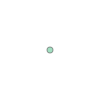

In [9]:
#probamos la funcion
crear_punto(long = estaciones.iloc[0].long,
            lat = estaciones.iloc[0].lat)

In [10]:
#iteramos a traves de todo nuestro dataset de estacoines y guardamos en una lista sus pares latlong como Points
lista = []
for i in estaciones.index:
    punto = crear_punto(long = estaciones.loc[i].long,
            lat = estaciones.loc[i].lat)
    lista.append(punto)
lista

In [11]:
#importamos geopandas
import geopandas as gpd

In [12]:
#convertimos nuestro DataFrame de estaciones en un GeoDataFrame
crs = {'init' :'epsg:4326'}
gdf = gpd.GeoDataFrame(estaciones,
                       geometry=lista,
                       crs={'init' :'epsg:4326'})
gdf.head()


/home/pipe/Proyectos/sube_od/matrizOD_sube/venv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,lat,long,nombre_estacion,id_estacion,geometry
0,-34.592423,-58.374715,002 - Retiro I,2,POINT (-58.37472 -34.59242)
1,-34.611032,-58.368260,003 - ADUANA,3,POINT (-58.36826 -34.61103)
2,-34.601726,-58.368763,004 - Plaza Roma,4,POINT (-58.36876 -34.60173)
3,-34.580550,-58.420954,005 - Plaza Italia,5,POINT (-58.42095 -34.58055)
4,-34.628526,-58.369758,006 - Parque Lezama,6,POINT (-58.36976 -34.62853)


In [13]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [14]:
#importamos las librerias de visualizacion
import matplotlib.pyplot as plt
%matplotlib inline

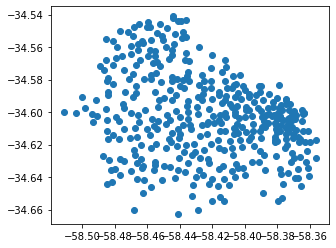

In [15]:
#visualizamos nuestras estaciones
gdf.plot()

In [16]:
#vemos que porcentajes de nuestras estaciones con viajes esta en nuestro shapefile
viajesXestacion.id_estacion_origen.isin(estaciones.id_estacion).sum() / len(viajesXestacion)

0.9383886255924171

In [17]:
#hacemos el merge en base a las columnas que actuan como clave
gdf = gdf.merge(viajesXestacion,
                              left_on = 'id_estacion',
                              right_on = 'id_estacion_origen',
                              how = 'inner'
                             )

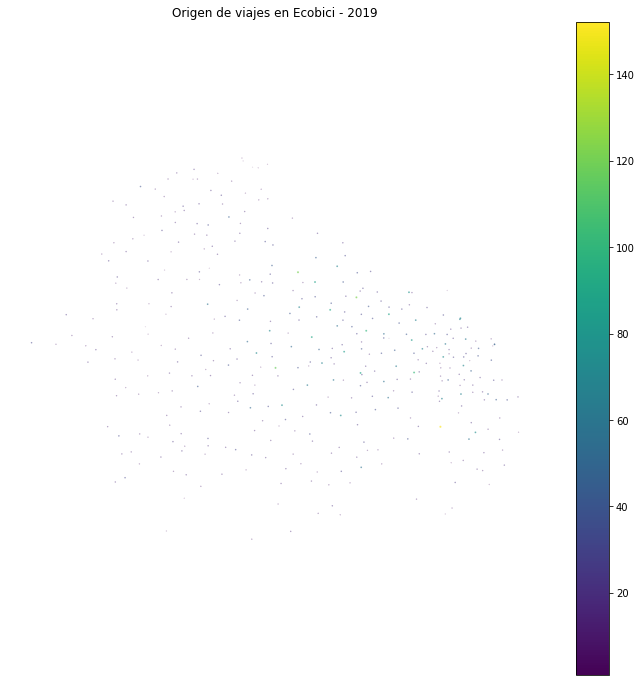

In [18]:
#creamos un plot que muestre el origen mas popular
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
gdf.plot(ax=ax,column='n',
                markersize=gdf['n']/100,
                alpha=0.5,legend=True) 
ax.set_axis_off()
plt.axis('equal')
ax.set_title('Origen de viajes en Ecobici - 2019');

In [19]:
#creamos un viaje agrupando por origen como destino, lo que nos da el par Origen-Destino de un viaje
viajes = dt.reindex(columns = ['id_estacion_origen','id_estacion_destino','id_usuario'])\
                    .groupby(['id_estacion_origen','id_estacion_destino']).count().reset_index()
viajes.columns = ['id_estacion_origen','id_estacion_destino','n']
viajes.sort_values(by='n',ascending=False).head(3)

,id_estacion_origen,id_estacion_destino,n
388,14.0,14.0,21
135,6.0,6.0,19
246,9.0,9.0,17


In [20]:
#usamos como indice el indice verdadero
estaciones.index = estaciones.id_estacion
estaciones.head()

,lat,long,nombre_estacion,id_estacion,geometry
id_estacion,,,,,
2,-34.592423,-58.374715,002 - Retiro I,2,POINT (-58.37472 -34.59242)
3,-34.611032,-58.368260,003 - ADUANA,3,POINT (-58.36826 -34.61103)
4,-34.601726,-58.368763,004 - Plaza Roma,4,POINT (-58.36876 -34.60173)
5,-34.580550,-58.420954,005 - Plaza Italia,5,POINT (-58.42095 -34.58055)
6,-34.628526,-58.369758,006 - Parque Lezama,6,POINT (-58.36976 -34.62853)


In [21]:
#importamos la funcion LineString
from shapely.geometry import LineString

In [22]:
#nos quedamos solo con los viajes cuyas estacinoes tenemos en el shape
viajes = viajes.loc[viajes.id_estacion_origen.isin(estaciones.index) &
                    (viajes.id_estacion_destino.isin(estaciones.index)),:]

In [23]:
#producimos una linea con el origen destino
geometrias = []
for indice,fila in viajes.iterrows():
    
    id_origen = fila.id_estacion_origen
    id_destino = fila.id_estacion_destino 
    
    punto_origen = [estaciones.loc[id_origen,'long'],\
                    estaciones.loc[id_origen,'lat']]
    punto_destino = [estaciones.loc[id_destino,'long'],\
                     estaciones.loc[id_destino,'lat']]
    
    linea = LineString([punto_origen,punto_destino])
    
    geometrias.append(linea)

In [24]:
#convertimos nuestro dataFrame en un geoDataFrame
viajes = gpd.GeoDataFrame(viajes,
                          geometry  = geometrias,
                          crs={'init' :'epsg:4326'})
viajes.head()

/home/pipe/Proyectos/sube_od/matrizOD_sube/venv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,id_estacion_origen,id_estacion_destino,n,geometry
4,2.0,2.0,4,"LINESTRING (-58.37472 -34.59242, -58.37472 -34..."
5,2.0,4.0,4,"LINESTRING (-58.37472 -34.59242, -58.36876 -34..."
6,2.0,5.0,1,"LINESTRING (-58.37472 -34.59242, -58.42095 -34..."
7,2.0,6.0,4,"LINESTRING (-58.37472 -34.59242, -58.36976 -34..."
8,2.0,8.0,1,"LINESTRING (-58.37472 -34.59242, -58.38934 -34..."


In [25]:
estaciones=gpd.GeoDataFrame(estaciones,geometry='geometry',crs={'init' :'epsg:4326'})

/home/pipe/Proyectos/sube_od/matrizOD_sube/venv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [26]:
comunas = gpd.read_file('../carto/CABA_comunas.geojson')
comunas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

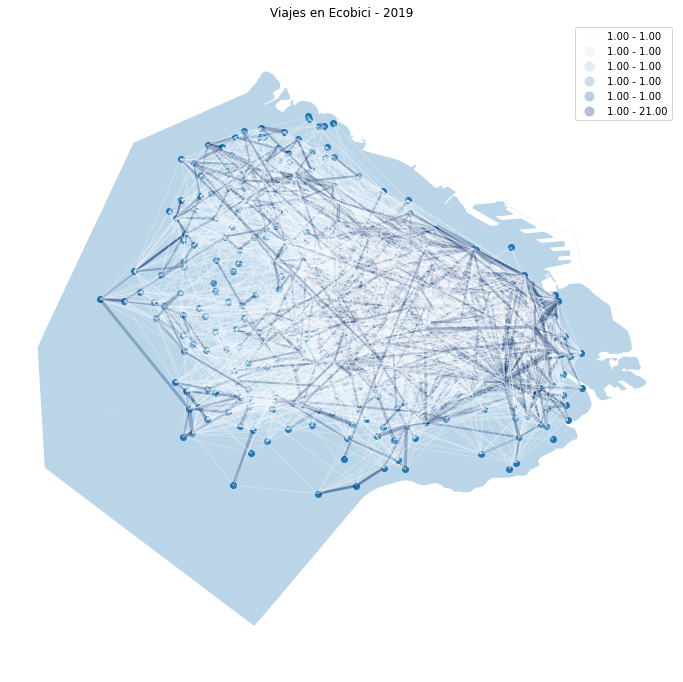

In [29]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

comunas.plot(ax=ax,alpha=0.3)
estaciones.plot(ax=ax)
viajes.plot(
        ax=ax,
        column = viajes['n'],
        linewidth=viajes['n'],
        alpha=0.3,
        cmap='Blues',    
        scheme='boxplot',
        legend=True) 
    
ax.set_axis_off()
plt.axis('equal')
ax.set_title('Viajes en Ecobici - 2019');

In [28]:
viajes.to_file('../carto/ecobici')